Getting Various Information on Tree Sequence!
(more detailed instructions/explanations for code in #green)

In [99]:
#first, import everything we need to analyze and visualize tree.
import pyslim, tskit
import numpy as np
import msprime
from IPython.display import SVG #for displaying trees in svg format
import matplotlib
import matplotlib.pyplot as plt #plotting
import matplotlib.cm as cm #color maps
%matplotlib inline

In [100]:
tree = pyslim.load("rem3.trees") #put inside tree seq of interest

In [101]:
#get info on tree individuals (# trees, individuals, genomes)
print(f"The tree sequence has {tree.num_trees} trees on a genome of length {tree.sequence_length},"
      f" {tree.num_individuals} individuals, {tree.num_samples} 'sample' genomes,"
      f" and {tree.num_mutations} mutations.")

The tree sequence has 98 trees on a genome of length 100000.0, 47605 individuals, 95210 'sample' genomes, and 0 mutations.


In [157]:
#check how many individuals there were in time, starting from present day t=0:
for t in np.unique(tree.individual_times):
  print(f"There are {np.sum(tree.individual_times == t)} individuals from time {t}.")
#^this makes a super long list of individuals so remove the last two # to see it.

There are 30 individuals from time 0.0.
There are 19 individuals from time 1.0.
There are 28 individuals from time 2.0.
There are 29 individuals from time 3.0.
There are 18 individuals from time 4.0.
There are 24 individuals from time 5.0.
There are 25 individuals from time 6.0.
There are 23 individuals from time 7.0.
There are 25 individuals from time 8.0.
There are 26 individuals from time 9.0.
There are 28 individuals from time 10.0.
There are 25 individuals from time 11.0.
There are 31 individuals from time 12.0.
There are 24 individuals from time 13.0.
There are 22 individuals from time 14.0.
There are 21 individuals from time 15.0.
There are 28 individuals from time 16.0.
There are 28 individuals from time 17.0.
There are 18 individuals from time 18.0.
There are 22 individuals from time 19.0.
There are 26 individuals from time 20.0.
There are 26 individuals from time 21.0.
There are 19 individuals from time 22.0.
There are 26 individuals from time 23.0.
There are 22 individuals f

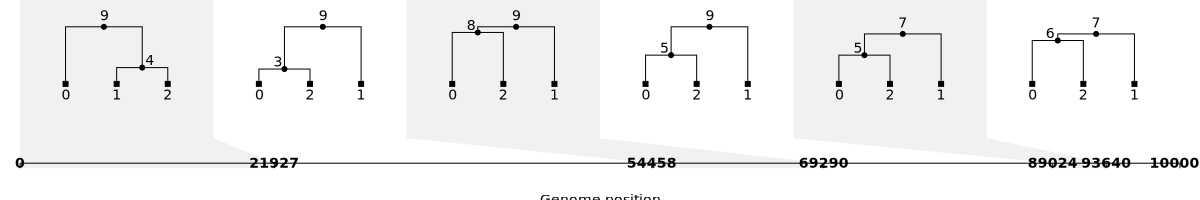

In [103]:
#recapitate and simplify tree:

rts= tree.recapitate(recombination_rate=1e-8, Ne=1000) #let rts be recapped tree

n = 3
np.random.seed(10)
sampled_nodes = np.random.choice(sts.samples(), n, replace=False)


sts = rts.simplify(sampled_nodes, keep_unary=False) #remove unary nodes

SVG(sts.draw_svg()) 

^Our simplified, recapitated tree sequence! 

Trying to get info on individuals and nodes now

Now, let's try plotting individual locations at specific times.
Used https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/ for reference

In [164]:
#First, define some groups
import matplotlib.pyplot as plt

alive = rts.individuals_alive_at(0)
sample = np.random.choice(alive, size=10) 
locs = rts.individual_locations[alive, :]
#for individuals at present day

old_ones = rts.individuals_alive_at(1999)
ancestors = np.random.choice(old_ones, size=5)
then = rts.individual_locations[old_ones, :]

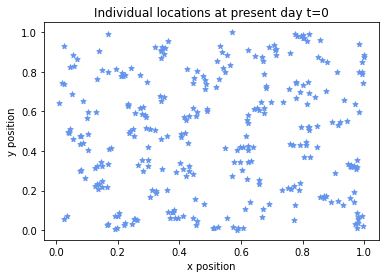

In [161]:
# plotting points as a scatter plot

# x-axis values
x=locs[:,0]

# y-axis values
y=locs[:,1]

plt.scatter(x, y, color= "cornflowerblue", marker= "*", s=30)
  
# x-axis label
plt.xlabel('x position')
# frequency label
plt.ylabel('y position')
# plot title
plt.title('Individual locations at present day t=0')
  
# function to show the plot
plt.show()


IT WORKS!!!!! WOOHOO!! ^_^

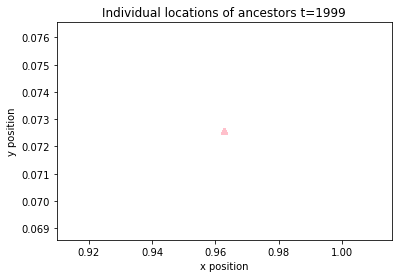

In [162]:
#repeat, but now for ancestors at t=1999

# x-axis values
x=then[:,0]

# y-axis values
y=then[:,1]

plt.scatter(x, y, color="pink", marker= "^", s=30)
  
# x-axis label
plt.xlabel('x position')
# frequency label
plt.ylabel('y position')
# plot title
plt.title('Individual locations of ancestors t=1999')
  
# function to show the plot
plt.show()


In [156]:
#hmm, why is there only 1 individual? 
#Maybe it has to do with nodes, or simplifying/recapitating.

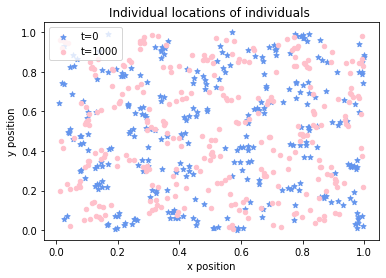

In [176]:
#new exercise: try overlaying individuals at t=0 and t=1000 (arbitrary) 
#to see how distance moved in 1000 time steps




# for present day indivduals t=0

x1=locs[:,0]

y1=locs[:,1]

plt.scatter(x1, y1, label= "t=0", color="cornflowerblue", marker= "*", s=30) #label=legend


# for individuals t=1000

#define individuals at t=1000
thousand=rts.individuals_alive_at(1000)
arb=rts.individual_locations[thousand, :]

x2=arb[:,0]

y2=arb[:,1]

plt.scatter(x2, y2, label= "t=1000", color="pink", marker= "o", s=20)



# x-axis label
plt.xlabel('x position')
# frequency label
plt.ylabel('y position')
# plot title
plt.title('Individual locations of individuals ')
plt.legend()
# function to show the plot
plt.show()





In [ ]:
#so now I understand how to make 2D plots, time to move onto 3d & add time component!
#also need to figure out nodes thing: is there a difference between plotting nodes vs individuals?